Name: Shafrin
ID:  337
Age: 21
X-ray report: Dataset/normal/IM-0491-0001.jpeg


The given X-Ray image is of type = Normal

The chances of image being Normal is : 95.14545202255249 percent


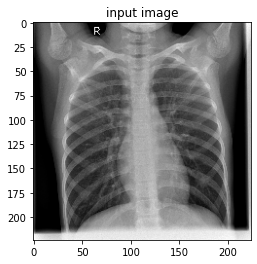

In [2]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from fpdf import FPDF
from PIL import Image
from datetime import datetime
import pyttsx3
import numpy as np
#from tensorflow import keras
from tensorflow.keras.models import load_model

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

converter = pyttsx3.init()
voice_id = "HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_MIKE_11.0"
converter.setProperty('voice', voice_id)  
converter.setProperty('rate', 170)
converter.setProperty('volume', 1)

pdf = FPDF()
pdf.add_page()

pdf.set_font("Helvetica", 'BU',size = 12)
pdf.cell(200, 10, txt = "COVID detection using X-ray report",ln = 1, align = 'C')

Name = input('Name: ')
ID   = input('ID:  ')
Age  = input('Age: ')
path = input('X-ray report: ')  
Time=datetime.date(datetime.now())

pdf.image(path,x=65,y=75,w=90,h=90)

pdf.set_font("Arial",size = 10)
pdf.cell(10, 10, txt = f'Time:  {Time}',ln =2, align = 'L')
pdf.cell(10, 10, txt = f'Patient\'s Name: {Name}',ln =3, align = 'L')
pdf.cell(10, 10, txt = f'Age: {Age}',ln =4, align = 'L')
# you can add any image path Dataset/covid/0a7faa2a.jpg
#path="Dataset/covid/0a7faa2a.jpg"
#predictions: path:- provide any image from google or provide image from all image folder
class_type = {0:'Covid',  1 : 'Normal'}
#model = keras.models.load_model('covid_detector')
myModel= load_model("covid_detector.model")
img = get_img_array(path)
res = class_type[round(myModel.predict(img)[0][0])]
print()
print()
print(f"The given X-Ray image is of type = {res}")
print()
pdf.set_font("Arial", 'BU',size = 12)
pdf.cell(200,10, txt = "Patient's xray report",ln = 6, align = 'C')



pdf.set_font("Arial",size = 12)
pdf.set_text_color(247, 13, 26)
pdf.cell(200, 10, txt = f"Result type: {res}",ln =1, align = 'C')


if res=='Covid':
    print(f"The chances of image being Covid is : {100-myModel.predict(img)[0][0]*100} percent")
    pdf.cell(200, 0, txt = f"Accuracy : {round(100-myModel.predict(img)[0][0]*100,2)}%",ln =2, align = 'C')
    converter.say(f"Hello {Name}, your x-ray report is ready. It shows a high-risk of covid. Please consult to a specialist as soon as posible. Wishing you a speedy recovery. Thank you")
else:
    print(f"The chances of image being Normal is : {myModel.predict(img)[0][0]*100} percent")
    pdf.cell(200, 0, txt = f"Accuracy: {round(myModel.predict(img)[0][0]*100,2)}%",ln =2, align = 'C')
    converter.say(f"Hello {Name}, your x-ray report is ready. It's absolutely fine. Take Care. Thank you")


pdf.output(f"{Name}_{ID}_report.pdf")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()
converter.runAndWait()
#Dataset/normal/IM-0147-0001.jpeg


           




         
            